In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df =pd.read_csv('/content/cleaned_data.csv')
df.head(5)

,invoice_id,branch,city,category,unit_price,quantity,date,payment_method,rating,profit_margin,total_price,hour
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-01-05,Ewallet,9.1,0.48,522.83,13
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-03-08,Cash,9.6,0.48,76.40,10
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,Credit card,7.4,0.33,324.31,13
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,Ewallet,8.4,0.33,465.76,20
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-02-08,Ewallet,5.3,0.48,604.17,10


In [60]:
df.dtypes

,0
invoice_id,int64
branch,object
city,object
category,object
unit_price,float64
quantity,float64
date,datetime64[ns]
payment_method,object
rating,float64
profit_margin,float64


In [61]:

if 'unit_price' in df.columns and 'quantity' in df.columns:
  df['total_price'] = df['unit_price'] * df['quantity']
else:
  print("Error: 'unit_price' or 'quantity' column not found in DataFrame.")

print(df.head())

   invoice_id   branch         city                category  unit_price  \
0           1  WALM003  San Antonio       Health and beauty       74.69   
1           2  WALM048    Harlingen  Electronic accessories       15.28   
2           3  WALM067  Haltom City      Home and lifestyle       46.33   
3           4  WALM064      Bedford       Health and beauty       58.22   
4           5  WALM013       Irving       Sports and travel       86.31   

   quantity       date payment_method  rating  profit_margin  hour  month  \
0       7.0 2019-01-05        Ewallet     9.1           0.48    13      1   
1       5.0 2019-03-08           Cash     9.6           0.48    10      3   
2       7.0 2019-03-03    Credit card     7.4           0.33    13      3   
3       8.0 2019-01-27        Ewallet     8.4           0.33    20      1   
4       7.0 2019-02-08        Ewallet     5.3           0.48    10      2   

   year    zscore month_year  total_price  
0  2019  2.893030    2019-01       522.83 

In [62]:
df.dtypes

,0
invoice_id,int64
branch,object
city,object
category,object
unit_price,float64
quantity,float64
date,datetime64[ns]
payment_method,object
rating,float64
profit_margin,float64


In [63]:

df.dtypes


,0
invoice_id,int64
branch,object
city,object
category,object
unit_price,float64
quantity,float64
date,datetime64[ns]
payment_method,object
rating,float64
profit_margin,float64


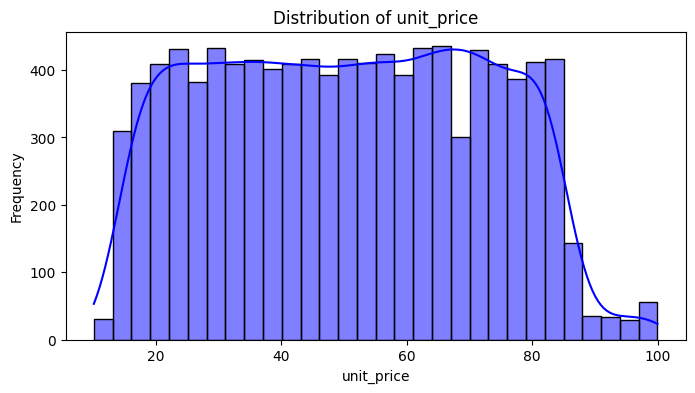

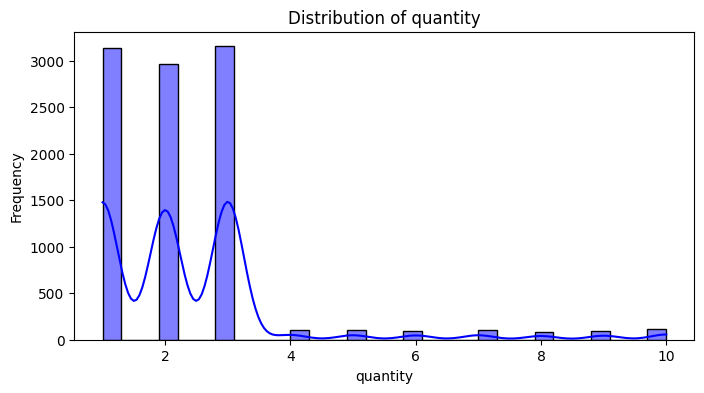

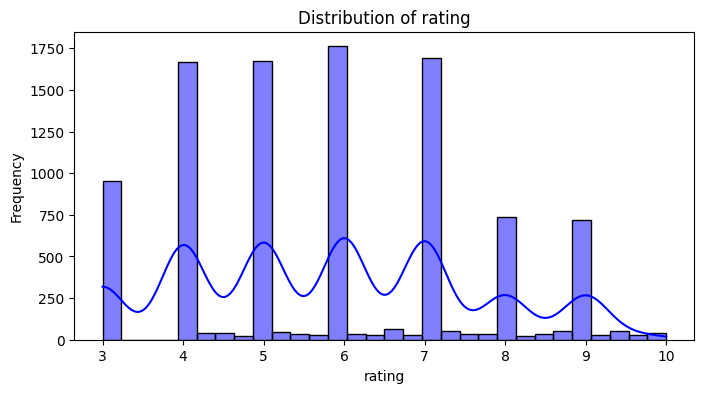

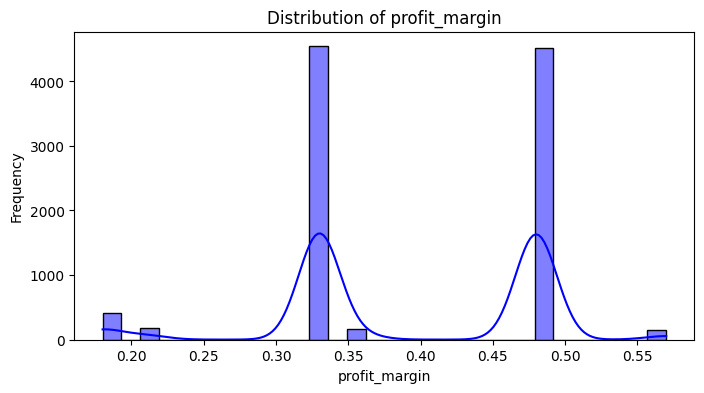

In [64]:
#Distribution of numerical columns
numerical_columns = ['unit_price', 'quantity', 'rating', 'profit_margin']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


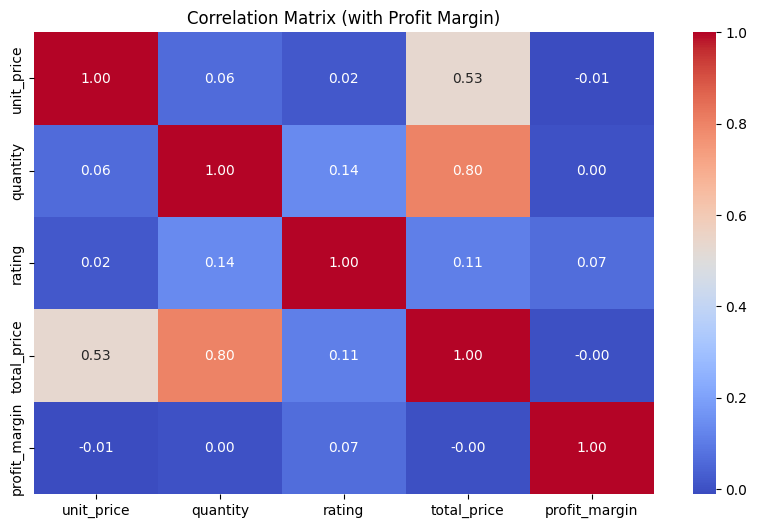

In [67]:
# Correlation heatmap focusing on profit_margin

plt.figure(figsize=(10, 6))

relevant_numerical_cols = ['unit_price', 'quantity', 'rating', 'total_price']
numerical_df = df[relevant_numerical_cols]

corr_matrix = numerical_df.corr()

profit_margin_corr = df[['profit_margin'] + relevant_numerical_cols].corr()['profit_margin']
corr_matrix['profit_margin'] = profit_margin_corr[1:]  # Exclude self-correlation
corr_matrix.loc['profit_margin'] = profit_margin_corr  # Add as a row

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (with Profit Margin)")
plt.show()

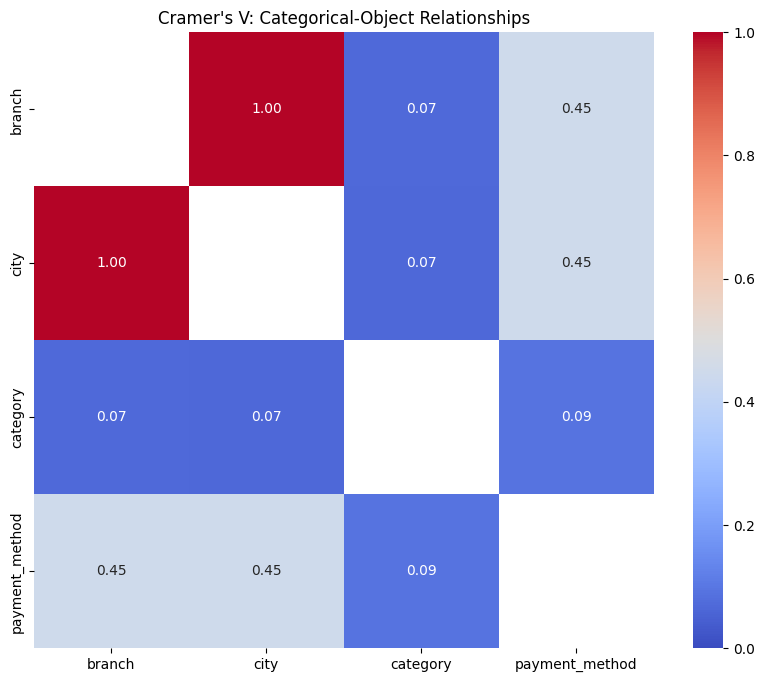

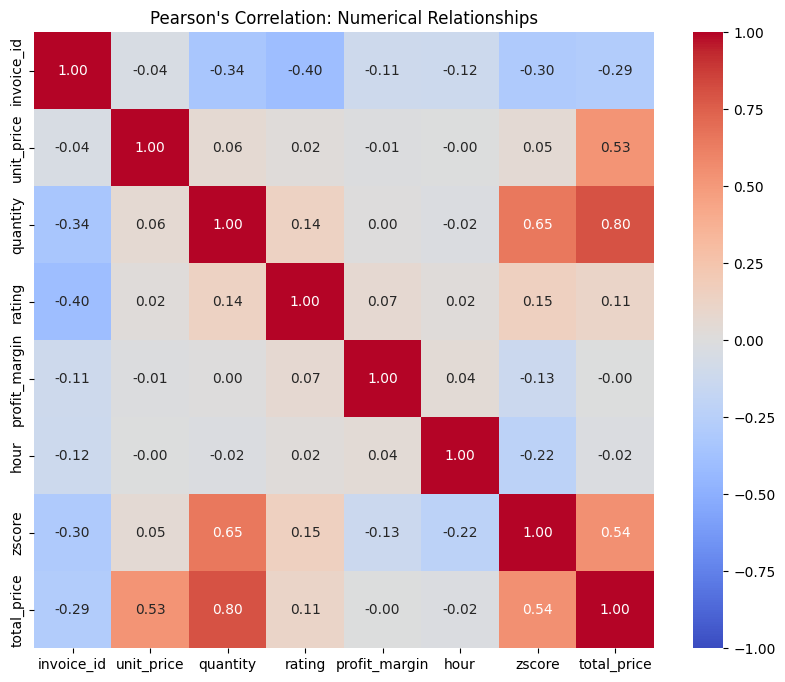

In [68]:

from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculates Cramer's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Filter categorical/object columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Filter numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

### Categorical Relationships ###
if len(categorical_cols) > 1:
    cat_corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 != col2:
                cat_corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
            else:
                cat_corr_matrix.loc[col1, col2] = np.nan  # Self-correlation is not meaningful

    cat_corr_matrix = cat_corr_matrix.apply(pd.to_numeric, errors='coerce')

    # Plot heatmap for categorical-object relationships
    plt.figure(figsize=(10, 8))
    sns.heatmap(cat_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
    plt.title("Cramer's V: Categorical-Object Relationships")
    plt.show()
else:
    print("No sufficient categorical columns to analyze relationships.")

### Numerical Relationships ###
if len(numerical_cols) > 1:
    num_corr_matrix = df[numerical_cols].corr()

    # Plot heatmap for numerical relationships
    plt.figure(figsize=(10, 8))
    sns.heatmap(num_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title("Pearson's Correlation: Numerical Relationships")
    plt.show()
else:
    print("No sufficient numerical columns to analyze relationships.")


Number of outliers detected: 374


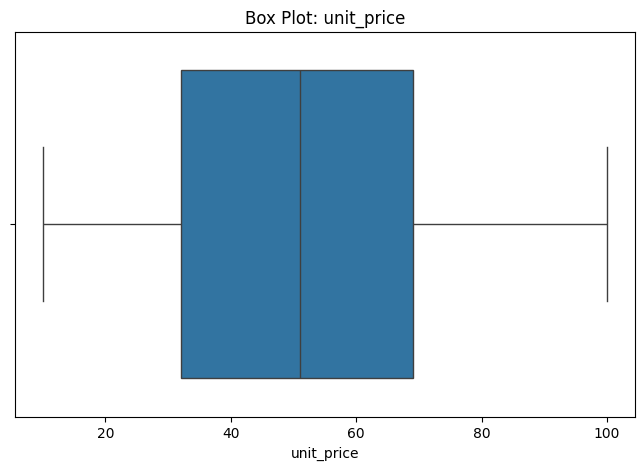

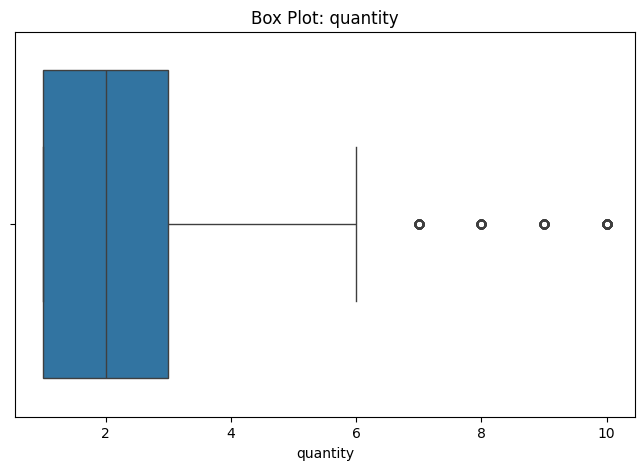

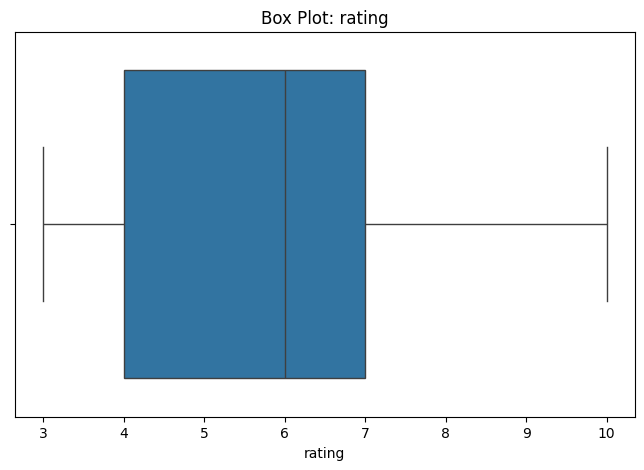

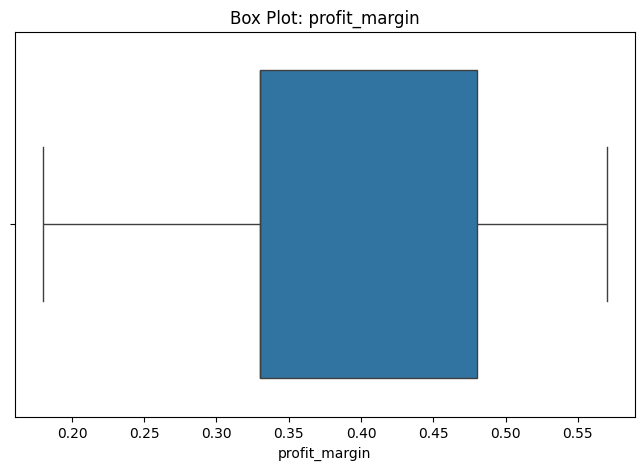

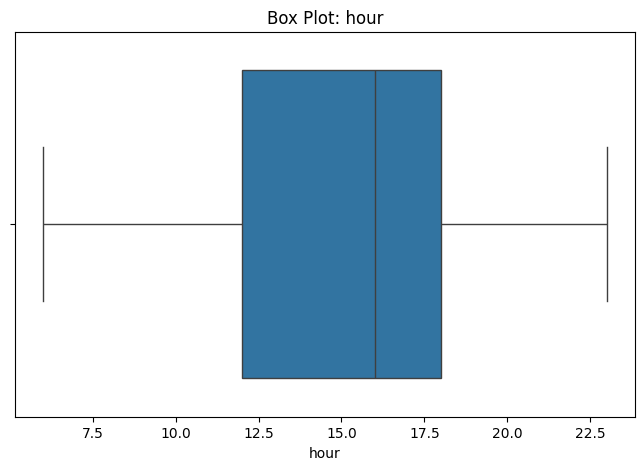

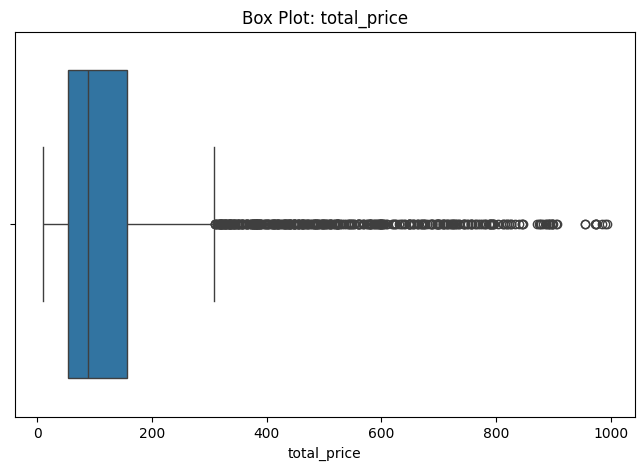

In [70]:
from scipy.stats import zscore

numerical_cols = ['unit_price', 'quantity', 'rating', 'profit_margin', 'hour','total_price']

df['zscore'] = df[numerical_cols].apply(zscore).abs().max(axis=1)
outliers = df[df['zscore'] > 3]
print(f"Number of outliers detected: {len(outliers)}")

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot: {col}")  # Corrected line
    plt.show()


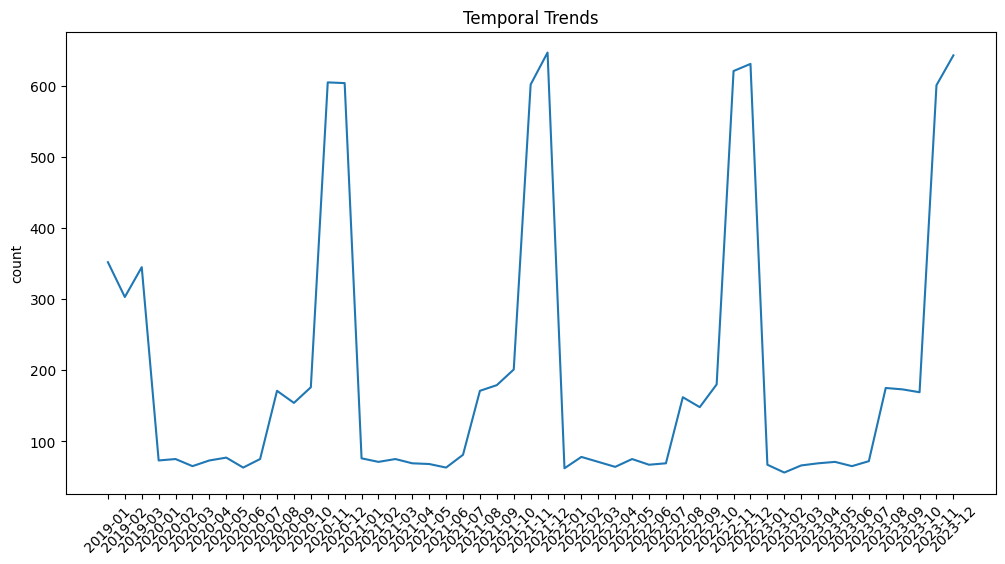

In [71]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year


    time_agg = df.groupby(['year', 'month']).size().reset_index(name='count')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=range(len(time_agg)), y=time_agg['count'])
    plt.xticks(ticks=range(len(time_agg)), labels=time_agg[['year', 'month']].apply(lambda x: f"{x['year']}-{x['month']:02d}", axis=1), rotation=45)
    plt.title("Temporal Trends")
    plt.show()


Top 12 Dates with Maximum Entries:
date
2021-12-01    48
2023-12-01    45
2020-12-01    38
2022-12-01    36
2021-11-25    33
2021-12-27    31
2022-12-31    31
2022-12-16    31
2020-11-27    31
2021-12-25    30
2022-11-30    30
2020-12-11    30
Name: count, dtype: int64


<ipython-input-72-babd0cbefe64>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_12_dates.index, y=top_12_dates.values, palette='coolwarm')


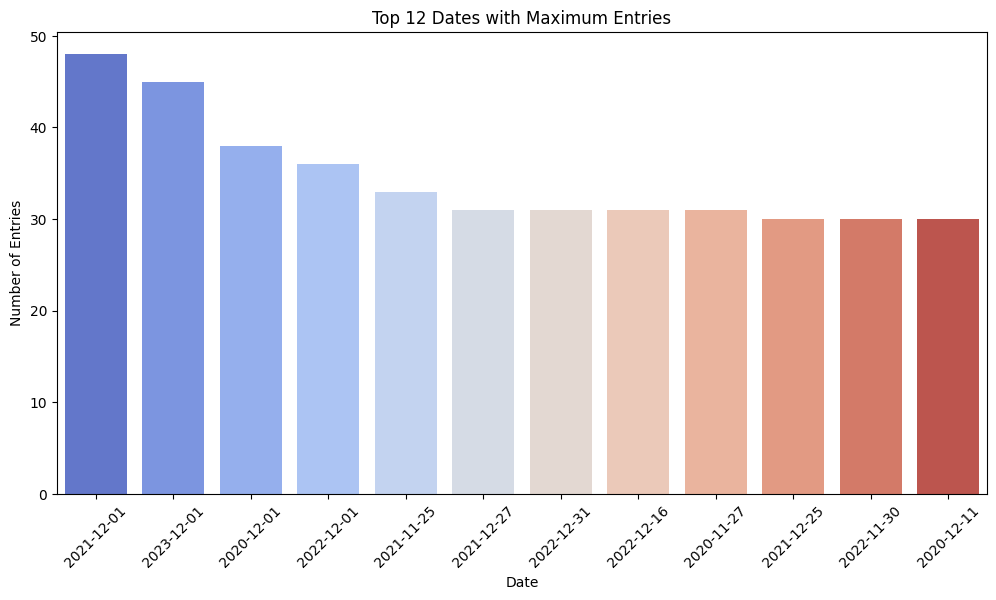

In [72]:
# top 12 most frequent dates and their counts
top_12_dates = df['date'].value_counts().head(12)

print("Top 12 Dates with Maximum Entries:")
print(top_12_dates)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_12_dates.index, y=top_12_dates.values, palette='coolwarm')
plt.title("Top 12 Dates with Maximum Entries")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Entries")
plt.show()


Top sales dates that coincide with holidays:
DatetimeIndex(['2021-11-25', '2022-12-31', '2021-12-25'], dtype='datetime64[ns]', freq=None)

Top sales dates distribution by weekdays:
0    1
1    1
2    2
3    2
4    4
5    2
Name: count, dtype: int64

Top sales dates distribution by month:
11    3
12    9
Name: count, dtype: int64

Top sales during November and December:
DatetimeIndex(['2021-12-01', '2023-12-01', '2020-12-01', '2022-12-01',
               '2021-11-25', '2021-12-27', '2022-12-31', '2022-12-16',
               '2020-11-27', '2021-12-25', '2022-11-30', '2020-12-11'],
              dtype='datetime64[ns]', freq=None)

Top sales during November and December:
DatetimeIndex(['2021-12-01', '2023-12-01', '2020-12-01', '2022-12-01',
               '2021-11-25', '2021-12-27', '2022-12-31', '2022-12-16',
               '2020-11-27', '2021-12-25', '2022-11-30', '2020-12-11'],
              dtype='datetime64[ns]', freq=None)


<ipython-input-73-3825254cf4ea>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_sales_dates_month_list, palette="coolwarm")


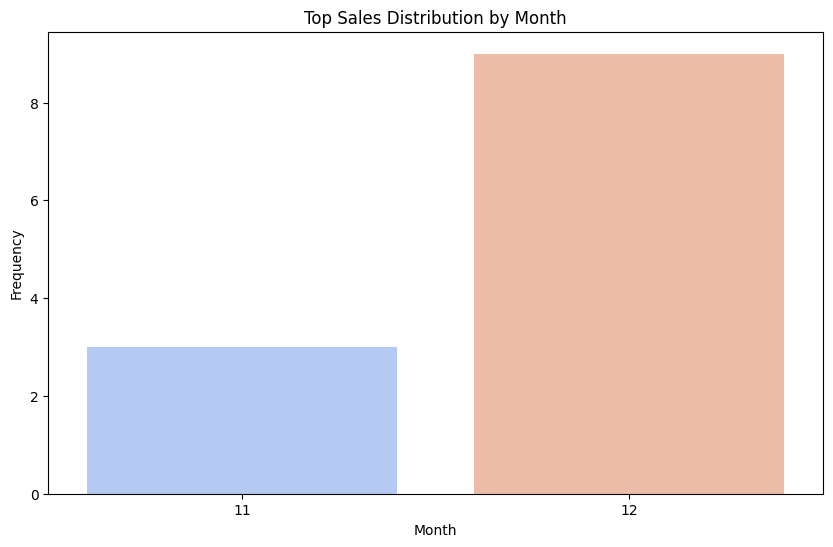

<ipython-input-73-3825254cf4ea>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=top_sales_dates_weekday_list, palette="coolwarm")


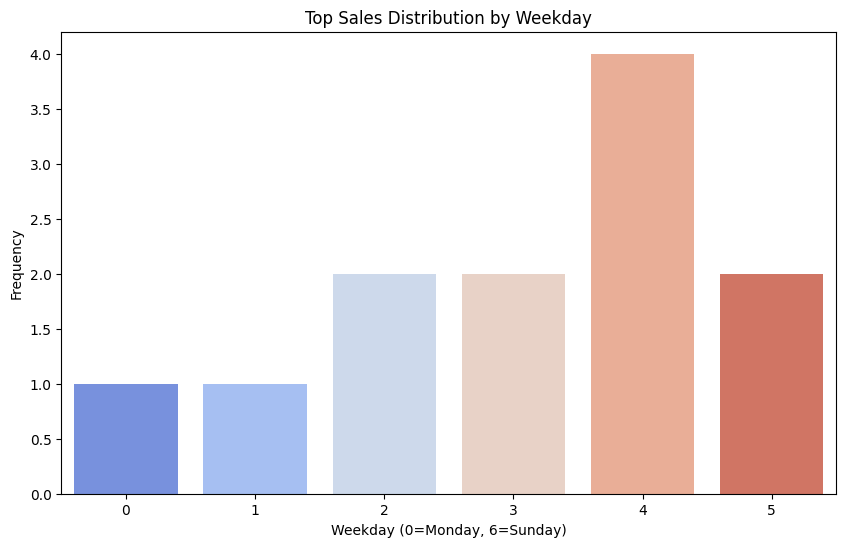

In [73]:

top_sales_dates = [
    "2021-12-01", "2023-12-01", "2020-12-01", "2022-12-01",
    "2021-11-25", "2021-12-27", "2022-12-31", "2022-12-16",
    "2020-11-27", "2021-12-25", "2022-11-30", "2020-12-11"
]


top_sales_dates = pd.to_datetime(top_sales_dates)


holidays = pd.to_datetime([
    "2021-12-25", "2022-12-25", "2023-12-25",  # Christmas
    "2021-12-31", "2022-12-31", "2023-12-31",  # New Year's Eve
    "2021-11-25", "2022-11-25", "2023-11-25",  # Thanksgiving (Black Friday)
])

holiday_sales = top_sales_dates[top_sales_dates.isin(holidays)]
print(f"Top sales dates that coincide with holidays:\n{holiday_sales}")

top_sales_dates_weekday = top_sales_dates.weekday.value_counts().sort_index()

print("\nTop sales dates distribution by weekdays:")
print(top_sales_dates_weekday)

top_sales_dates_month = top_sales_dates.month.value_counts().sort_index()

print("\nTop sales dates distribution by month:")
print(top_sales_dates_month)

# Checking if the sales are higher towards the end of the year (end-of-year effect)
end_of_year_sales = top_sales_dates[top_sales_dates.month.isin([11, 12])]

print(f"\nTop sales during November and December:\n{end_of_year_sales}")
print(f"\nTop sales during November and December:\n{end_of_year_sales}")

top_sales_dates_month_list = top_sales_dates.month
top_sales_dates_weekday_list = top_sales_dates.weekday


plt.figure(figsize=(10, 6))
sns.countplot(x=top_sales_dates_month_list, palette="coolwarm")
plt.title("Top Sales Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=top_sales_dates_weekday_list, palette="coolwarm")
plt.title("Top Sales Distribution by Weekday")
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-74-471b2d159d61>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Set2')


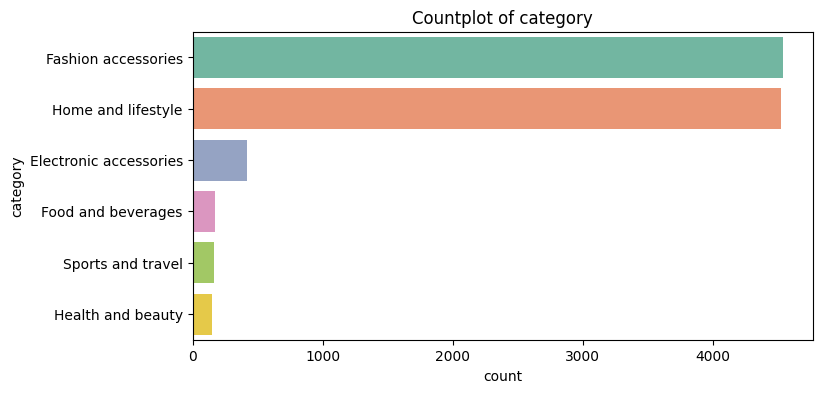

<ipython-input-74-471b2d159d61>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Set2')


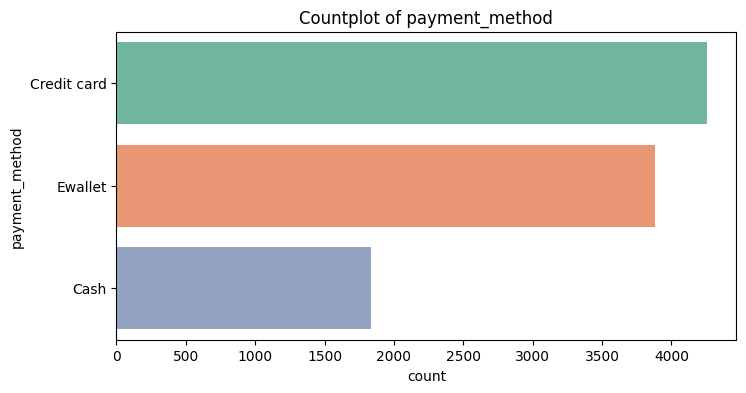

In [74]:
# Categorical Data Analysis: Count plots for categorical variables
categorical_columns = ['category', 'payment_method']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Countplot of {col}")
    plt.show()


In [76]:
df.dtypes


,0
invoice_id,int64
branch,object
city,object
category,object
unit_price,float64
quantity,float64
date,datetime64[ns]
payment_method,object
rating,float64
profit_margin,float64


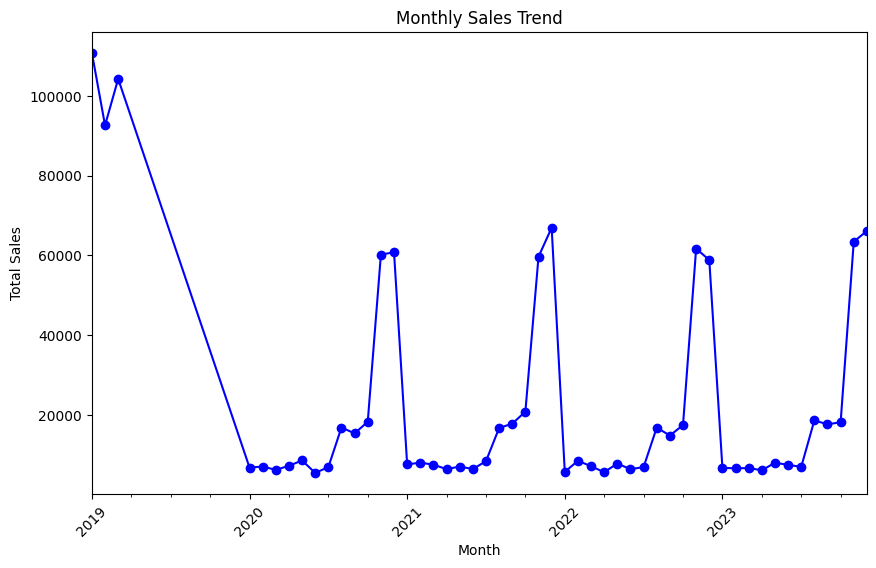

In [77]:
# monthly sales trend
monthly_sales = df.groupby('month_year')['total_price'].sum()

# Plotting the monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


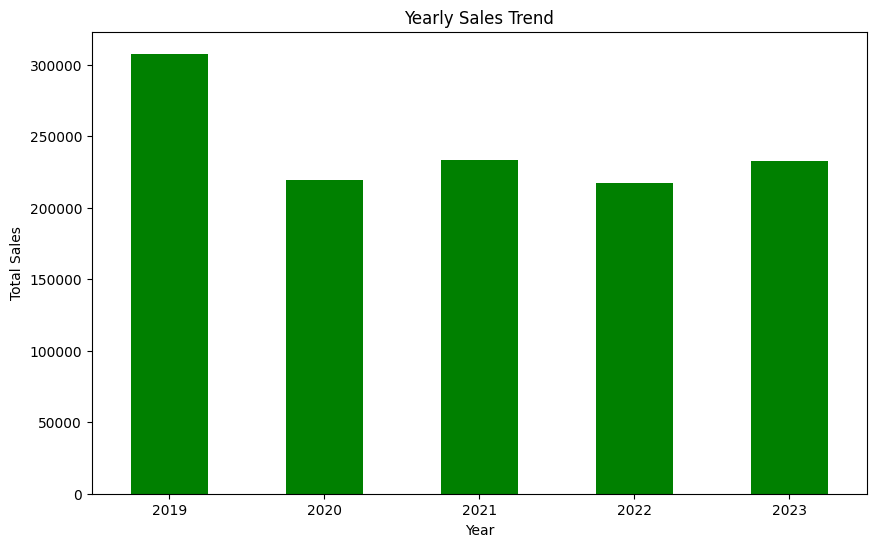

In [78]:
# Yearly sales trend
yearly_sales = df.groupby('year')['total_price'].sum()

# Plotting the yearly sales trend
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='g')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


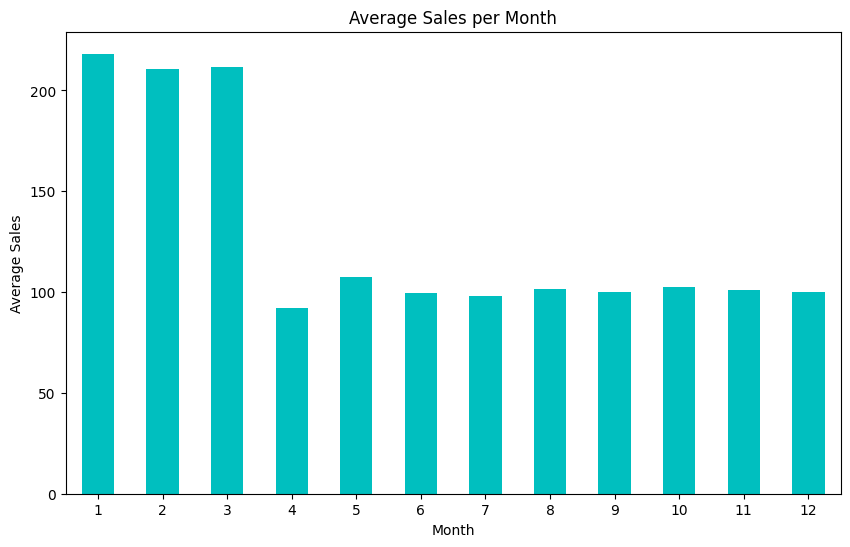

In [79]:
# Average sales per month
monthly_avg_sales = df.groupby('month')['total_price'].mean()

# Plotting the seasonal sales pattern (monthly)
plt.figure(figsize=(10, 6))
monthly_avg_sales.plot(kind='bar', color='c')
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


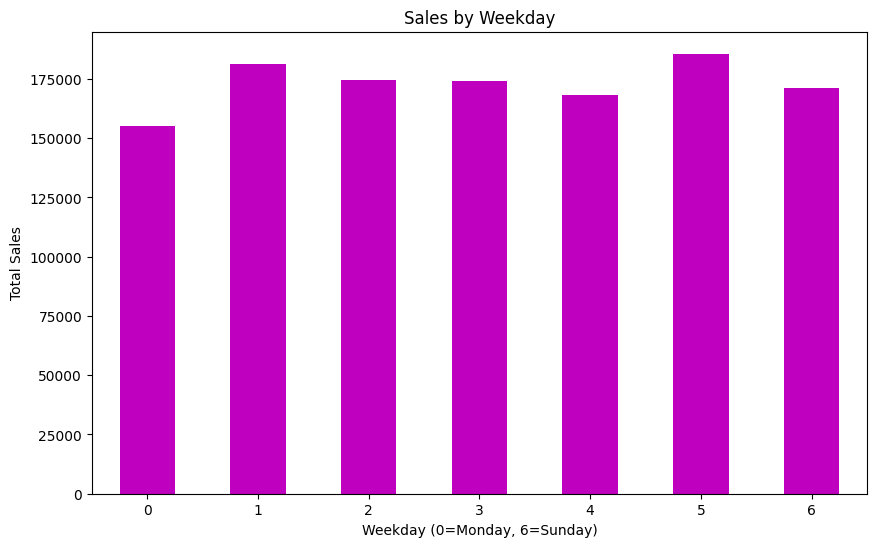

In [80]:
# Weakly sales trend
df['weekday'] = df['date'].dt.weekday
weekday_sales = df.groupby('weekday')['total_price'].sum()

# Plotting weekday sales
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='m')
plt.title('Sales by Weekday')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


**PRODUCT ANALYSIS**

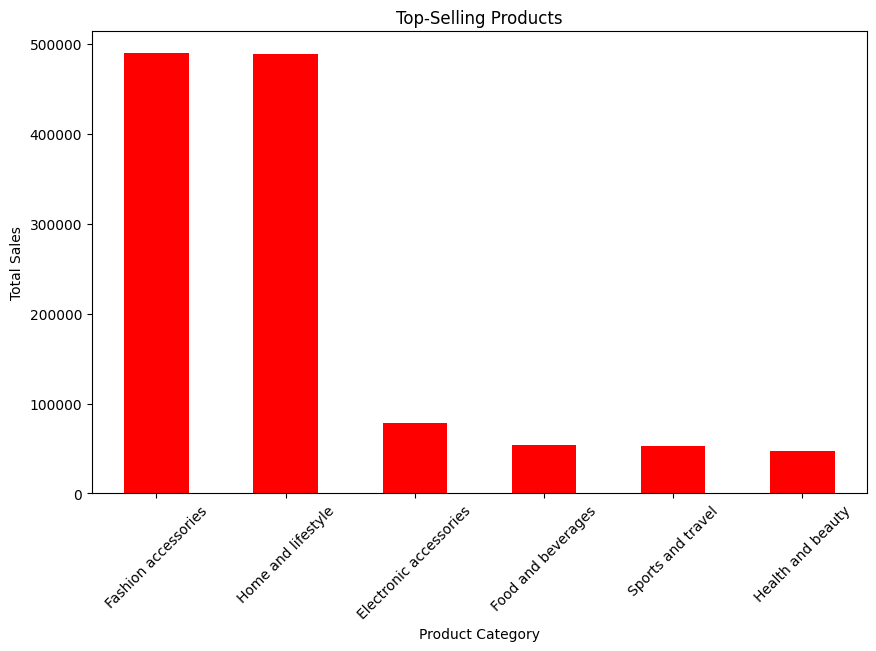

In [81]:

top_selling_products = df.groupby('category')['total_price'].sum().sort_values(ascending=False)

# Plotting top-selling products
plt.figure(figsize=(10, 6))
top_selling_products.head(10).plot(kind='bar', color='r')
plt.title('Top-Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


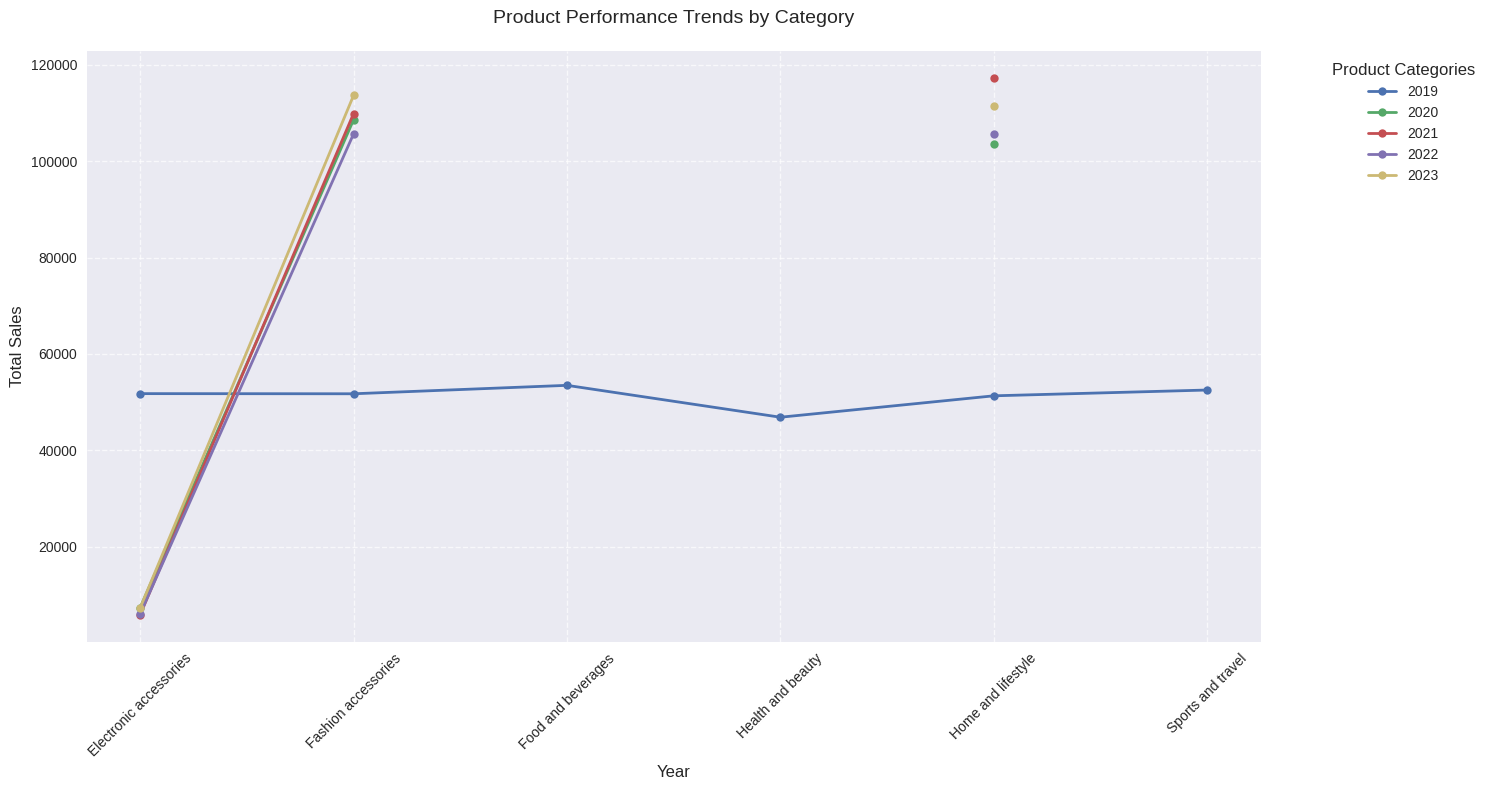

In [86]:

sns.set_palette("colorblind")
plt.style.use('seaborn-v0_8')  # or use 'seaborn-darkgrid'

plt.figure(figsize=(15, 8))

for column in product_performance.columns:
    plt.plot(product_performance.index,
             product_performance[column],
             label=column,
             marker='o',  # Add markers at data points
             markersize=6,
             linewidth=2)

plt.title('Product Performance Trends by Category', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Product Categories', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(product_performance.index, rotation=45)

plt.grid(True, which='minor', linestyle=':', alpha=0.4)

plt.tight_layout()

# Show the plot
plt.show()

**Customer Lifetime Value (CLTV)**

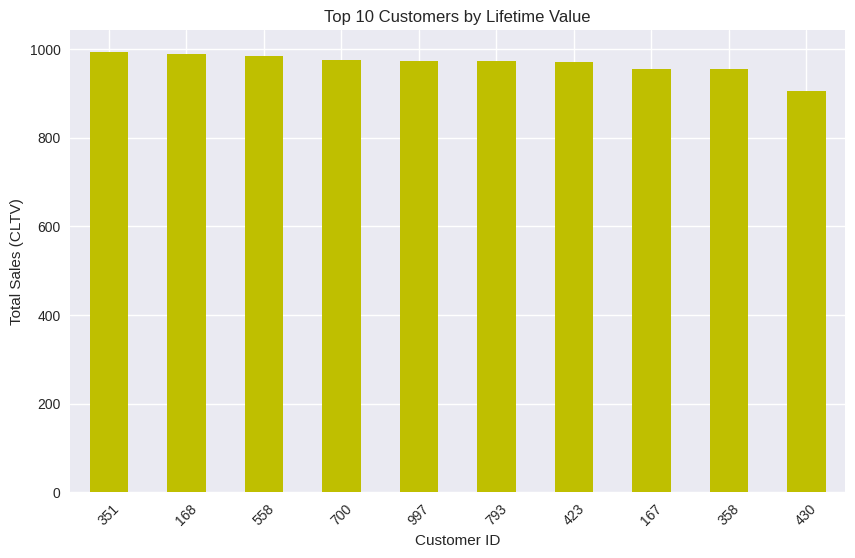

In [88]:
cltv = df.groupby('invoice_id')['total_price'].sum()

cltv_sorted = cltv.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cltv_sorted.head(10).plot(kind='bar', color='y')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales (CLTV)')
plt.xticks(rotation=45)
plt.show()


**Pricing Analysis**

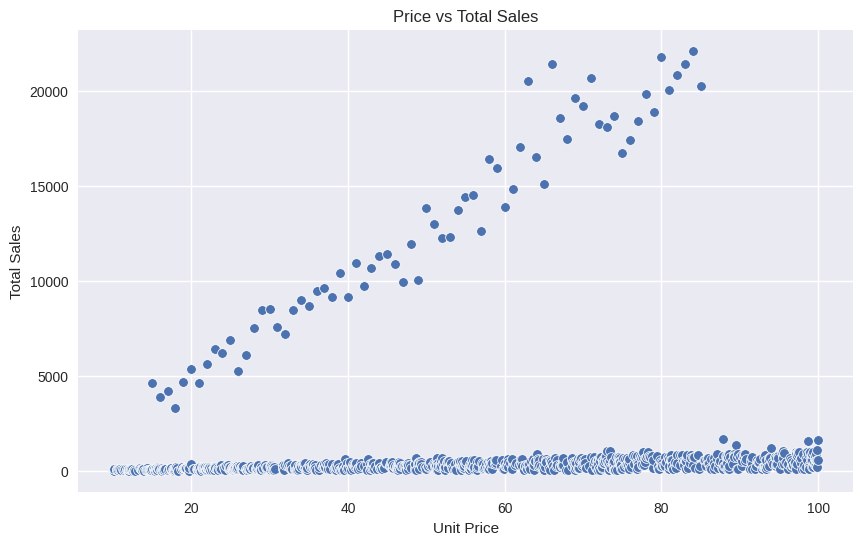

In [89]:
price_elasticity = df.groupby('unit_price').agg({'total_price': 'sum', 'quantity': 'sum'})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='unit_price', y='total_price', data=price_elasticity)
plt.title('Price vs Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()


**Forecasting with a simple moving average**

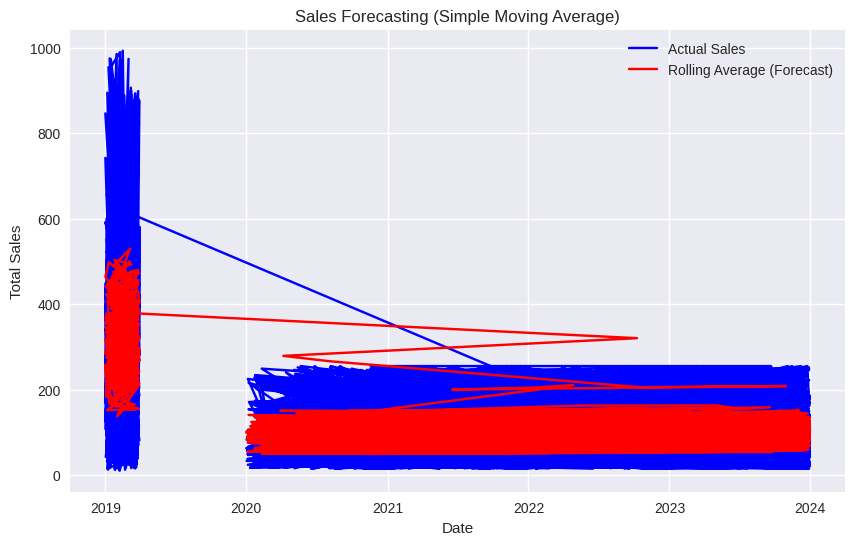

In [90]:
df.set_index('date', inplace=True)
sales_rolling_avg = df['total_price'].rolling(window=12).mean()

# Plotting the sales forecast
plt.figure(figsize=(10, 6))
plt.plot(df['total_price'], label='Actual Sales', color='b')
plt.plot(sales_rolling_avg, label='Rolling Average (Forecast)', color='r')
plt.title('Sales Forecasting (Simple Moving Average)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()
